# Linear Regression

In this lab, we'll take a look at how to build and evaluate linear regression models. Linear regression works well when there is an (approximately) linear
relationship between the features and the variable we're trying to predict.

Before we start, let's import the Python packages we'll need for the tutorial:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Univariate example

Here's an example from [Tim Niven's tutorial at Kaggle](https://www.kaggle.com/timniven/linear-regression-tutorial).

### Background

We would like to perform
_univariate_ linear regression using a single feature $x$, "Number of hours studied," to predict a single dependent variable, $y$, "Exam score."

We can say that we want to regress `num_hours_studied` onto `exam_score` in order to obtain a model to predict a student's exam score using the
number of hours he or she studied.

In the standard setting, we assume that the dependent variable (the exam score) is a random variable that has a Gaussian distribution
whose mean is a linear function of the independent variable(s) (the number of hours studied) and whose variance is unknown but constant:

$$ y \sim \cal{N}(\theta_0 + \theta_1 x, \sigma^2) $$

Our model or hypothesis, then, will be a function predicting $y$ based on $x$:

$$ h_{\mathbf{\theta}}(x) = \theta_0 + \theta_1 x $$

Next we'll do something very typical in machine learning experiment: generate some _synthetic_ data for which we know the "correct" model, then
use those data to test our algorithm for finding the best model.

So let's generate some example data and examine the relationship between $x$ and $y$:


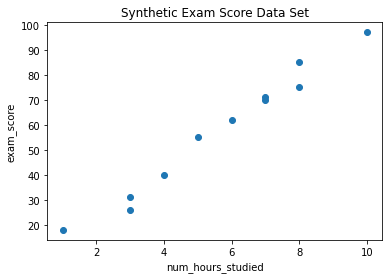

In [2]:
# Independent variable

num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])

# Dependent variable

exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

# Plot the data

plt.scatter(num_hours_studied, exam_score)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.title('Synthetic Exam Score Data Set')
plt.show()

### Design Matrix

The design matrix, usually written $\mathtt{X}$, contains our independent variables.

In general, with $m$ data points and $n$ features (independent variables), our design matrix will have $m$ rows and $n$ columns.

Note that we have a parameter $\theta_0$, which is the $y$-intercept term in our linear model. There is no independent variable to multiple
$\theta_0$, so we will introduced a _dummy variable_ always equal to 1 to represent the independent variable corresponding to $\theta_0$.

Putting the dummy variable and the number of hours studied together, we obtain the design matrix
$$ \mathtt{X} = \begin{bmatrix}
    1 & 1\\
    1 & 3\\
    1 & 3\\
    1 & 4\\
    1 & 5\\
    1 & 6\\
    1 & 7\\
    1 & 7\\
    1 & 8\\
    1 & 8\\
    1 & 10\\
\end{bmatrix} .
$$

Notice that we do **not** include the dependent variable (exam score) in the design matrix.

In [3]:
# Add dummy variable for intercept term to design matrix.
# Understand the numpy insert function by reading https://numpy.org/doc/stable/reference/generated/numpy.insert.html

X = np.array([num_hours_studied]).T
X = np.insert(X, 0, 1, axis=1)
y = exam_score
print(X.shape)
print(y.shape)

(11, 2)
(11,)


###  Hypothesis

Let's rewrite the hypothesis function now that we have a dummy variable for the intercept term in the model.
We can write the independent variables including the dummy variable as a vector

$$\mathbf{x} = \begin{bmatrix} x_0 \\ x_1 \end{bmatrix}, $$

where $x_0 = 1$ is our dummy variable and $x_1$ is the number of hours studied. We also write the parameters
as a vector

$$\mathbf{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} .$$

Now we can conveniently write the hypothesis as

$$ h_\mathbf{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x} . $$

Here is Python code to evaluate a hypothesis $\mathbf{\theta}$ for an entire design matrix:

In [4]:
# Evaluate hypothesis over a design matrix

def h(X,theta):
    return X.dot(theta)

h(X, np.array([0, 10]))

array([ 10,  30,  30,  40,  50,  60,  70,  70,  80,  80, 100])

### Cost function

How can we find the best value of $\mathbf{\theta}$? We need a _cost function_ and an _algorithm to minimize_ that cost function.

In a regression problem, we normally use _squared error_ to measure the goodness of fit:

\begin{align}
\ J(\mathbf{\theta}) & = \frac{1}{2} \sum_{i=1}^{m}\left(h_\mathbf{\theta}\left(\mathbf{x}^{(i)}\right) - y^{(i)}\right)^2 \\
\                    & = \frac{1}{2} \left( \mathtt{X} \mathbf{\theta} - \mathbf{y} \right)^\top \left( \mathtt{X} \mathbf{\theta} - \mathbf{y} \right)
\end{align}

Here we've used $\mathtt{X}$ to denote the design matrix and $\mathbf{y}$ to denote the vector
$$\begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix} $$

We'll see in a moment how to minimize this cost function. First, let's implement it in Python:

In [5]:
m = y.shape[0]

def cost(theta, X, y):
    return (h(X, theta) - y).T.dot(h(X, theta) - y)/2

cost(np.array([0, 10]), X, y)

85.0

### Aside: minimizing a convex function using the gradient

To solve our linear regression problem, we want to minimize the cost function $J(\mathbf{\theta})$ above with respect to the parameters
$\mathbf{\theta}$.

$J$ is convex (see [Wikipedia](https://en.wikipedia.org/wiki/Convex_function) for an explanation) so it has just one minimum for some specific value
of $\mathbf{\theta}$.

To find this minimum, we will find the point at which the gradient is equal to the zero vector.

The gradient of a multivariate function at a particular point
is a vector pointing in the direction of maximum slope with a magnitude indicating the slope of the tangent at that point.

To make this clear, let's consider an example in which we consider the function
$f(x) = 4x^2 - 6x + 11$ on the interval $[-10, 10]$ and plot its tangent lines at regular intervals.

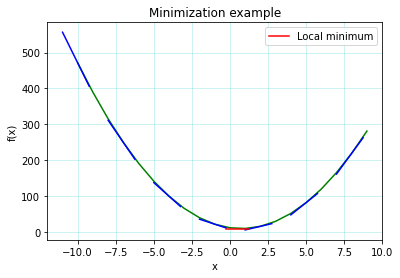

In [6]:
# Define range for plotting x

x = np.arange(-10, 10, 1)

# Example function f(x)

def f(x):
    return 4 * x * x - 6 * x + 11

# Plot f(x)

plt.plot(x, f(x), 'g')

# First derivative of f(x)

def dfx(x):
    return 8 * x - 6

# Plot tangent lines for f(x)

for i in np.arange(-10,10,3):
    x_i = np.arange(i - 1.0, i + 1.0, .25)
    m_i = dfx(i)
    c =  f(i) - m_i*i
    y_i = m_i*(x_i)  +  c
    plt.plot(x_i,y_i,'b')

# Plot tangent line at the minimum of f(x)

minimum = 0.75

for i in [minimum]:
    x_i = np.arange(i - 1, i + 1, .5)
    m_i = dfx(i)
    c = f(i) - m_i * i
    y_i = m_i * (x_i) + c
    plt.plot(x_i, y_i, 'r-', label='Local minimum')

# Decorate the plot

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Minimization example')
plt.grid(axis='both',color='c', alpha=0.25)
plt.legend();
plt.show()

### Minimizing the cost function

Based on the previous example, we can see that to minimize our cost function, we just need to take the gradient with respect
to $\mathbf{\theta}$ and determine where that gradient is equal to $\mathbf{0}$.

We have
$$ J(\mathbf{\theta}) = \frac{1}{2} \sum_{i=1}^{m} \left(h_\mathbf{\theta}(\mathbf{x}^{(i)}) - y^{(i)}\right)^2 .$$
This is a convex function of two variables ($\theta_0$ and $\theta_1$), so it has a single minimum where the
gradient
$\nabla_J(\mathbf{\theta})$ is $\mathbf{0}$.

Depending on the specific data, the cost function will look something like the surface plotted by the following code.
Regardless of where we begin, the gradient always points "uphill," away from the global minimum.

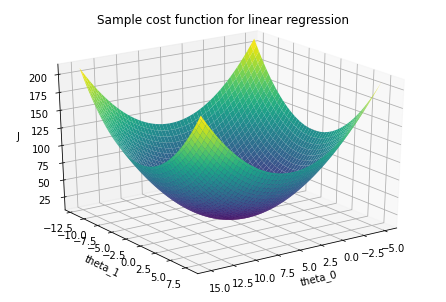

In [7]:
# Plot a sample 2D squared error cost function

from mpl_toolkits.mplot3d import Axes3D

x1 = np.linspace(-5.0, 15.0, 100)
x2 = np.linspace(-12.0, 8.0, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = (np.square(X1 - np.mean(X1)) + np.square(X2 - np.mean(X2))) + 10

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('J')
ax.set_title('Sample cost function for linear regression')
cm = plt.cm.get_cmap('viridis')
ax.plot_surface(X1, X2, Y, cmap=cm)
ax.view_init(elev=25, azim=55)
plt.show()

Take a look at the lecture notes. If you obtain the partial derivatives of the cost function $J$ with
respect to $\mathbf{\theta}$, you get

$$ \nabla_J(\mathbf{\theta}) = \mathtt{X}^\top (\mathtt{X}\mathbf{\theta}-\mathbf{y}).$$

In Python, we might write

In [8]:
# Gradient of cost function

def gradient(X, y, theta):
    grad = X.T.dot(h(X, theta) - y)
    return grad

gradient(X, y, np.array([0, 10]))

array([-10, -13])

This means that if we currently had the parameter vector \[0, 10\] (where the cost is 85) and wanted to _increase_ the cost, we could move in the
direction \[-10, -13\]. On the other hand, if we wanted to
_decrease_ the cost (which of course we do), we should move in the opposite direction, i.e., \[10, 13\]. Here is a bit of
code to implement this idea of _gradient descent_:

In [9]:
def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    theta = theta_initial
    for iter in np.arange(num_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

gradient_descent(X, y, np.array([0, 10]), 0.001, 10)

(array([ 0.08327017, 10.02116759]),
 array([84.775269  , 84.65958757, 84.5793525 , 84.51074587, 84.44605981,
        84.38279953, 84.32015717, 84.25787073, 84.19585485, 84.13408132]),
 array([[-10.        , -13.        ],
        [ -9.084     ,  -6.894     ],
        [ -8.556648  ,  -3.421524  ],
        [ -8.25039038,  -1.4471287 ],
        [ -8.06991411,  -0.32491618],
        [ -7.96100025,   0.31253312],
        [ -7.8928063 ,   0.67422616],
        [ -7.84778746,   0.87905671],
        [ -7.81596331,   0.9946576 ],
        [ -7.79165648,   1.05950182]]))

In [10]:
# optimize for parameters 
theta_initial = np.array([0, 0])
alpha = 0.0001
iterations = 3000
theta, costs, grad = gradient_descent(X, y, theta_initial, alpha, iterations)
print('Optimal parameters: theta_0 %f theta_1 %f' % (theta[0], theta[1]))

Optimal parameters: theta_0 2.654577 theta_1 9.641848


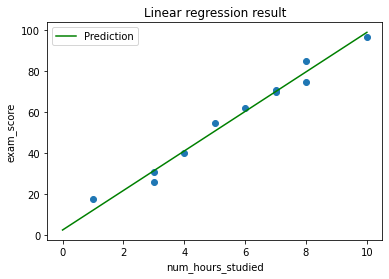

In [11]:
# Visualize the results

plt.scatter(num_hours_studied, exam_score)

x = np.linspace(0,10,20)
y_predicted = theta[0] + theta[1] * x
plt.plot(x, y_predicted, 'g', label='Prediction')

plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.legend();
plt.title('Linear regression result')
plt.show()

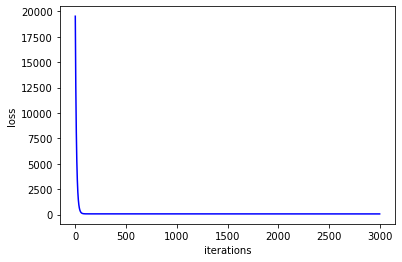

In [12]:
# Visualize the loss
x_loss = np.arange(0, iterations, 1)

plt.plot(x_loss, costs, 'b-')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

### Goodness of fit

$R^2$ is a statistic that will give some information about the goodness of fit of a regression model. 
The $R^2$ coefficient of determination is 1 when the regression predictions perfectly fit the data.
When $R^2$ is less than 1, it indicates the percentage of the variance in the target that is accounted
for by the prediction.

\begin{align}
\ R^2 = 1 - \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\bar{y}^\left(i\right) \right)^2}
\end{align}

In [13]:
y_predicted =  h(X,theta)
r_square = 1 - np.square(y - y_predicted.T).sum()/np.square(y - y.mean()).sum()
print(r_square)

0.9786239731773175


An $R^2$ of 0.98 indicates an extremely good (outrageously good, in fact) fit to the data.

## Multivariate linear regression example

Next, we extend to multiple variables. We'll use a data set from
Andrew Ng's class. The data include two independent variables, "Square Feet" and "Number of Bedrooms," and the dependent variable is "Price."

Let's load the data:

In [14]:
# We use genfromtxt to load the data from the text file.

raw_data = np.genfromtxt('Housing_data.txt',delimiter = ',', dtype=str);

raw_data

array([['Square Feet', ' Number of bedrooms', 'Price'],
       ['2104', '3', '399900'],
       ['1600', '3', '329900'],
       ['2400', '3', '369000'],
       ['1416', '2', '232000'],
       ['3000', '4', '539900'],
       ['1985', '4', '299900'],
       ['1534', '3', '314900'],
       ['1427', '3', '198999'],
       ['1380', '3', '212000'],
       ['1494', '3', '242500'],
       ['1940', '4', '239999'],
       ['2000', '3', '347000'],
       ['1890', '3', '329999'],
       ['4478', '5', '699900'],
       ['1268', '3', '259900'],
       ['2300', '4', '449900'],
       ['1320', '2', '299900'],
       ['1236', '3', '199900'],
       ['2609', '4', '499998'],
       ['3031', '4', '599000'],
       ['1767', '3', '252900'],
       ['1888', '2', '255000'],
       ['1604', '3', '242900'],
       ['1962', '4', '259900'],
       ['3890', '3', '573900'],
       ['1100', '3', '249900'],
       ['1458', '3', '464500'],
       ['2526', '3', '469000'],
       ['2200', '3', '475000'],
       ['2637', 

In [15]:
# Extract headers and data
headers = raw_data[0,:];
print(headers)
data = np.array(raw_data[1:,:], dtype=float);
print(data)

['Square Feet' ' Number of bedrooms' 'Price']
[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]
 [1.94000e+03 4.00000e+00 2.39999e+05]
 [2.00000e+03 3.00000e+00 3.47000e+05]
 [1.89000e+03 3.00000e+00 3.29999e+05]
 [4.47800e+03 5.00000e+00 6.99900e+05]
 [1.26800e+03 3.00000e+00 2.59900e+05]
 [2.30000e+03 4.00000e+00 4.49900e+05]
 [1.32000e+03 2.00000e+00 2.99900e+05]
 [1.23600e+03 3.00000e+00 1.99900e+05]
 [2.60900e+03 4.00000e+00 4.99998e+05]
 [3.03100e+03 4.00000e+00 5.99000e+05]
 [1.76700e+03 3.00000e+00 2.52900e+05]
 [1.88800e+03 2.00000e+00 2.55000e+05]
 [1.60400e+03 3.00000e+00 2.42900e+05]
 [1.96200e+03 4.00000e+00 2.59900e+05]
 [3.89000e+03 3.00

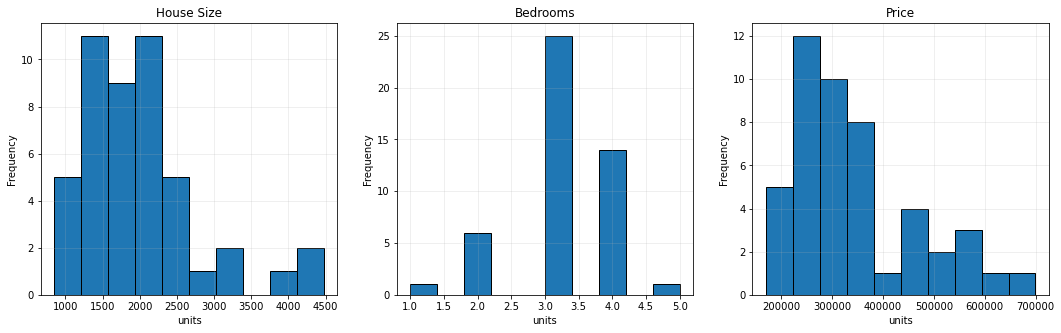

In [16]:
# Visualise the distribution of independent and dependent variables
'''Create subplots in 1 row and 3 columns'''
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)

plt1.hist(data[:,0], label='Sq. feet', edgecolor='black')
plt1.set_title('House Size')
plt1.set_xlabel('units')
plt1.set_ylabel('Frequency')
plt1.grid(axis='both', alpha=.25)

plt2.hist(data[:,1], label='Bedroom', edgecolor='black')
plt2.set_title('Bedrooms')
plt2.set_xlabel('units')
plt2.set_ylabel('Frequency')
plt2.grid(axis='both', alpha=.25)

plt3.hist(data[:,2], label='Price', edgecolor='black')
plt3.set_title('Price')
plt3.set_xlabel('units')
plt3.set_ylabel('Frequency')
plt3.grid(axis='both', alpha=.25)

In [17]:
# Standardize the data
# The independent variables, house size and number of bedrooms, have units that are widely different
# The range of house size is between 1000 and 45000
# The range of bedrooms is from 1 to 5
# Standardizing/Normalizing the data is the process of putting different variables on the same scale
# If we do not standandardize data the congvergence to global minima might not be achieved

data_norm = (data-np.mean(data, axis = 0))/np.std(data, axis = 0)

In [18]:
# Extract y from data

y_label = 'Price';
y_index = np.where(headers == y_label)[0][0];
y = data_norm[:,y_index];

# Extract x from data

X = data_norm[:,0:y_index];

In [19]:
# Insert column of 1's for intercept column

X = np.insert(X, 0, 1, axis=1)

In [20]:
m = X.shape[0]
n = X.shape[1]

In [21]:
# Optimize the parameters using gradient descent

theta_initial = np.zeros((X.shape[1],1))
alpha = 0.0005
iterations = 10000
theta, cost, grad = gradient_descent(X,np.array([y]).T,theta_initial,alpha,iterations)
print('Theta values ', theta)

Theta values  [[-1.04222186e-16]
 [ 8.84765988e-01]
 [-5.31788197e-02]]


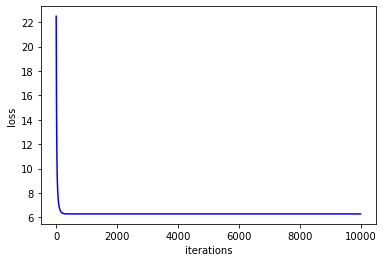

In [22]:
# Visualize the loss
x_loss = np.arange(0,iterations,1)

plt.plot(x_loss, cost, 'b-')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [23]:
# Goodness of fit
y_predicted =  h(X,theta)
r_square = 1 - np.square(y - y_predicted.T).sum()/np.square(y - y.mean()).sum()
print(r_square)

0.7329450180289143


### Transform standardized data back to original scale

We can transform standardized predicted values, `y_predicted` into the
orginal data scale using 
$$y_{\text{norm}} = \sigma_y y + \mu_y$$ 

In [24]:
# Compute mean and standard deviation of data

sigma = np.array(np.std(data,axis=0))
mu = np.array(np.mean(data,axis=0))

# De-normalize y

y_predicted =  np.round(h(X, theta) * sigma[2] + mu[2])

# Print first five values of y_predicted

print(y_predicted[0:5,:])

[[356283.]
 [286121.]
 [397489.]
 [269244.]
 [472278.]]


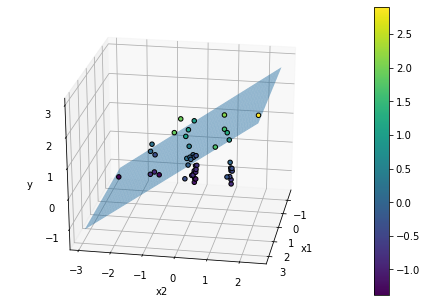

In [25]:
# 3D plot of standardized data

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(X[:,1],X[:,2],y,edgecolors='black',c=data_norm[:,2],alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

X1 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))
X2 = np.linspace(min(X[:,2]), max(X[:,2]), len(y))

xx1,xx2 = np.meshgrid(X1,X2)

yy = (theta[0] + theta[1]*xx1.T + theta[2]*xx2)
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=25, azim=10)
plt.colorbar(p)
plt.show()


## In-class exercise

Now that you're familiar with minimizing a cost function using
its gradient and gradient descent, refer to the lecture notes
to find the analytical solution (the normal equations)
to the linear regression problem.

Implement the normal equation approach for the synthetic
univariate data set and the housing price data set. Demonstrate
your solution in the lab.


## Take-home exercise

Find an interesting dataset for linear regression on Kaggle.
Implement the normal equations and gradient descent then evaluate
your model's performance.

Write a brief report on your experiments and results in the form
of a Jupyter notebook.

Your report is due before the next lab session on Aug 18.